## Generate the path

In [1]:
import sys
import os
import numpy as np
import pandas as pd


In [2]:
# Add project root to path
sys.path.append('..') # Add '#' at the beginning of this line if the pipeline does not work on your computer


## load data

In [3]:
from src.data_loader import DataLoader

# Load all data
loader = DataLoader()
data = loader.load_data()

price_data = data['price_data']
news_data = data['news_data']
fundamental_data = data['fundamental_data']

print("SUCCESS: All data loaded!")
print(f"Price data: {price_data.shape}")
print(f"News data: {news_data.shape}")
print(f"Fundamental data: {fundamental_data.shape}")

print("Price data columns:", price_data.columns.tolist()[:5], "...")
print("News data columns:", news_data.columns.tolist()[:5], "...")
print("Fundamental data columns:", fundamental_data.columns.tolist()[:5], "...")

print("Fundamental data sample:")
print(fundamental_data.head(3))

Loading config from: f:\Upenn\CIS5450 - big data analysis\project_repo\CIS545_Repo\config\parameters.yaml
Loading data...
Loading price data from: f:\Upenn\CIS5450 - big data analysis\project_repo\CIS545_Repo\data/raw/AAPL.US_M5.xlsx
Price data shape: (104028, 6)
Loading news data from: f:\Upenn\CIS5450 - big data analysis\project_repo\CIS545_Repo\data/raw/apple_news_data.xlsx
News data shape: (42127, 27)
Loading fundamental data from: f:\Upenn\CIS5450 - big data analysis\project_repo\CIS545_Repo\data/raw/iw0erafaqkjcbrw6.xlsx
Fundamental data shape: (76, 78)
SUCCESS: All data loaded!
Price data: (104028, 6)
News data: (42127, 27)
Fundamental data: (76, 78)
Price data columns: ['datetime', 'open', 'high', 'low', 'close'] ...
News data columns: ['date', 'title', 'content', 'link', 'symbols'] ...
Fundamental data columns: ['gvkey', 'permno', 'adate', 'qdate', 'public_date'] ...
Fundamental data sample:
   gvkey  permno      adate      qdate public_date   CAPEI     bm     evm  \
0   1690 

In [4]:
# Check data structure before merging
print(" CHECKING DATA STRUCTURE")

print("\n" + "="*50)
print(" PRICE DATA STRUCTURE")
print("="*50)
print(f"Shape: {price_data.shape}")
print(f"Columns: {price_data.columns.tolist()}")
print(f"Data types:")
print(price_data.dtypes)
print(f"\nFirst 2 rows:")
print(price_data.head(2))

print("\n" + "="*50)
print(" NEWS DATA STRUCTURE")
print("="*50)
print(f"Shape: {news_data.shape}")
print(f"Columns: {news_data.columns.tolist()}")
print(f"Data types:")
print(news_data.dtypes)
print(f"\nFirst 2 rows:")
print(news_data.head(2))

print("\n" + "="*50)
print(" FUNDAMENTAL DATA STRUCTURE")
print("="*50)
print(f"Shape: {fundamental_data.shape}")
print(f"Columns: {fundamental_data.columns.tolist()}")
print(f"Data types:")
print(fundamental_data.dtypes)
print(f"\nFirst 2 rows:")
print(fundamental_data.head(2))

# Check for sentiment-related columns in news data
print("\n" + "="*50)
print(" SENTIMENT COLUMNS IN NEWS DATA")
print("="*50)
sentiment_cols = [col for col in news_data.columns if 'sentiment' in col.lower()]
print(f"Sentiment-related columns: {sentiment_cols}")
if sentiment_cols:
    for col in sentiment_cols:
        print(f"  {col}: {news_data[col].dtype}")
        print(f"  Sample values: {news_data[col].head(3).tolist()}")

# Check date columns in each dataset
print("\n" + "="*50)
print(" DATE COLUMNS IN EACH DATASET1")
print("="*50)
print("Price data date columns:", [col for col in price_data.columns if 'date' in col.lower() or 'time' in col.lower()])
print("News data date columns:", [col for col in news_data.columns if 'date' in col.lower() or 'time' in col.lower()])
print("Fundamental data date columns:", [col for col in fundamental_data.columns if 'date' in col.lower() or 'time' in col.lower()])

 CHECKING DATA STRUCTURE

 PRICE DATA STRUCTURE
Shape: (104028, 6)
Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
Data types:
datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
dtype: object

First 2 rows:
             datetime   open   high    low  close  volume
0 2018-11-30 17:50:00  44.60  44.64  44.55  44.63  179494
1 2018-11-30 17:55:00  44.63  44.63  44.52  44.52  218881

 NEWS DATA STRUCTURE
Shape: (42127, 27)
Columns: ['date', 'title', 'content', 'link', 'symbols', 'tags', 'sentiment_polarity', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26']
Data types:
date                   object
title           

## Merge

### 1: Check data structure in all datasets

In [5]:
print("Price Data:")
print(f"  Shape: {price_data.shape}")
print(f"  Columns: {price_data.columns.tolist()}")
print(f"  First datetime: {price_data['datetime'].min()}")
print(f"  Last datetime: {price_data['datetime'].max()}")

print("\nNews Data:")
print(f"  Shape: {news_data.shape}")
print(f"  Date columns: {[col for col in news_data.columns if 'date' in col.lower()]}")
print(f"  Sentiment columns: {[col for col in news_data.columns if 'sentiment' in col.lower()]}")

print("\nFundamental Data:")
print(f"  Shape: {fundamental_data.shape}")
print(f"  Date columns: {[col for col in fundamental_data.columns if 'date' in col.lower()]}")
print(f"  Key metrics: {['CAPEI', 'bm', 'evm', 'pe_op_basic', 'roa', 'roe']}")

Price Data:
  Shape: (104028, 6)
  Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
  First datetime: 2018-11-30 17:50:00
  Last datetime: 2024-03-13 23:00:00

News Data:
  Shape: (42127, 27)
  Date columns: ['date']
  Sentiment columns: ['sentiment_polarity', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos']

Fundamental Data:
  Shape: (76, 78)
  Date columns: ['adate', 'qdate', 'public_date']
  Key metrics: ['CAPEI', 'bm', 'evm', 'pe_op_basic', 'roa', 'roe']


### 2: Create unified date columns for merging

In [6]:
# Price data: extract date from datetime
price_data['merge_date'] = pd.to_datetime(price_data['datetime']).dt.date
print(f" Price data: created merge_date from datetime")
print(f"   Date range: {price_data['merge_date'].min()} to {price_data['merge_date'].max()}")

# News data: convert and clean date column
news_data['merge_date'] = pd.to_datetime(news_data['date'], errors='coerce').dt.date
initial_news_count = len(news_data)
news_data = news_data.dropna(subset=['merge_date'])
cleaned_news_count = len(news_data)
print(f" News data: created merge_date from date column")
print(f"   Removed {initial_news_count - cleaned_news_count} rows with invalid dates")
print(f"   Date range: {news_data['merge_date'].min()} to {news_data['merge_date'].max()}")

# Fundamental data: use public_date as reference date
fundamental_data['merge_date'] = pd.to_datetime(fundamental_data['public_date']).dt.date
print(f" Fundamental data: created merge_date from public_date")
print(f"   Date range: {fundamental_data['merge_date'].min()} to {fundamental_data['merge_date'].max()}")

 Price data: created merge_date from datetime
   Date range: 2018-11-30 to 2024-03-13
 News data: created merge_date from date column
   Removed 12376 rows with invalid dates
   Date range: 2016-02-19 to 2024-11-27
 Fundamental data: created merge_date from public_date
   Date range: 2018-01-31 to 2024-04-30


### 3: Process sentiment data and convert to numeric

In [7]:
sentiment_cols = ['sentiment_polarity', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos']
converted_cols = []

for col in sentiment_cols:
    if col in news_data.columns:
        news_data[col] = pd.to_numeric(news_data[col], errors='coerce')
        converted_cols.append(col)
        valid_count = news_data[col].notna().sum()
        print(f"Converted {col}: {valid_count} valid values")

print(f"   Total sentiment columns processed: {len(converted_cols)}")

Converted sentiment_polarity: 29462 valid values
Converted sentiment_neg: 29474 valid values
Converted sentiment_neu: 29496 valid values
Converted sentiment_pos: 29476 valid values
   Total sentiment columns processed: 4


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5864\3549590123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data[col] = pd.to_numeric(news_data[col], errors='coerce')


### 4: Aggregate sentiment data by date

In [8]:
daily_sentiment = news_data.groupby('merge_date').agg({
    'sentiment_polarity': 'mean',
    'sentiment_neg': 'mean', 
    'sentiment_neu': 'mean',
    'sentiment_pos': 'mean',
    'title': 'count'
}).reset_index()

# Rename columns for clarity
daily_sentiment.columns = [
    'merge_date', 
    'avg_sentiment_polarity', 
    'avg_sentiment_neg', 
    'avg_sentiment_neu', 
    'avg_sentiment_pos', 
    'daily_news_count'
]

print(f"   Created daily sentiment aggregation")
print(f"   Unique dates with news: {len(daily_sentiment)}")
print(f"   Total news articles: {daily_sentiment['daily_news_count'].sum()}")
print(f"   Aggregated columns: {daily_sentiment.columns.tolist()}")

   Created daily sentiment aggregation
   Unique dates with news: 1574
   Total news articles: 29751
   Aggregated columns: ['merge_date', 'avg_sentiment_polarity', 'avg_sentiment_neg', 'avg_sentiment_neu', 'avg_sentiment_pos', 'daily_news_count']


### 5: Merge price data with daily sentiment

In [9]:
price_with_sentiment = pd.merge(
    price_data, 
    daily_sentiment, 
    on='merge_date', 
    how='left'  # Keep all price records
)

print(f"   Successfully merged price and sentiment data")
print(f"   Before merge: {price_data.shape}")
print(f"   After merge: {price_with_sentiment.shape}")

# Check merge results
sentiment_coverage = price_with_sentiment['avg_sentiment_polarity'].notna().sum()
total_records = len(price_with_sentiment)
print(f"   Records with sentiment data: {sentiment_coverage}/{total_records} ({sentiment_coverage/total_records*100:.1f}%)")

   Successfully merged price and sentiment data
   Before merge: (104028, 7)
   After merge: (104028, 12)
   Records with sentiment data: 74220/104028 (71.3%)


### 6: Prepare fundamental data for merging

In [10]:
# Select key fundamental metrics
key_fundamental_metrics = [
    'merge_date', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 
    'roa', 'roe', 'npm', 'ps', 'de_ratio'
]

# Filter to only include columns that exist
available_metrics = [col for col in key_fundamental_metrics if col in fundamental_data.columns]
fundamental_subset = fundamental_data[available_metrics].copy()

print(f" Selected fundamental metrics:")
for metric in available_metrics:
    if metric != 'merge_date':
        valid_count = fundamental_subset[metric].notna().sum()
        print(f"   - {metric}: {valid_count} valid values")


 Selected fundamental metrics:
   - CAPEI: 76 valid values
   - bm: 76 valid values
   - evm: 76 valid values
   - pe_op_basic: 76 valid values
   - pe_op_dil: 76 valid values
   - roa: 76 valid values
   - roe: 76 valid values
   - npm: 76 valid values
   - ps: 76 valid values
   - de_ratio: 76 valid values


### 7: Final merge with fundamental data

In [11]:

merged_data = pd.merge(
    price_with_sentiment,
    fundamental_subset,
    on='merge_date',
    how='left'  # Keep all price-sentiment records
)

print(f"   Final merge completed!")
print(f"   Final dataset shape: {merged_data.shape}")
print(f"   Total columns: {len(merged_data.columns)}")

# Check fundamental data coverage
if 'pe_op_basic' in merged_data.columns:
    fundamental_coverage = merged_data['pe_op_basic'].notna().sum()
    print(f"   Records with fundamental data: {fundamental_coverage}/{len(merged_data)} ({fundamental_coverage/len(merged_data)*100:.1f}%)")

   Final merge completed!
   Final dataset shape: (104028, 22)
   Total columns: 22
   Records with fundamental data: 3595/104028 (3.5%)


### 8: Display final merged dataset summary

In [12]:
print("="*60)
print("FINAL MERGED DATASET OVERVIEW")
print("="*60)

print(f" Dataset Shape: {merged_data.shape}")
print(f" Date Range: {merged_data['merge_date'].min()} to {merged_data['merge_date'].max()}")
print(f" Time Frequency: 5-minute intervals")

print(f" COLUMN CATEGORIES:")
price_cols = [col for col in merged_data.columns if col in ['datetime', 'open', 'high', 'low', 'close', 'volume', 'merge_date']]
sentiment_cols = [col for col in merged_data.columns if 'sentiment' in col.lower() or 'news' in col.lower()]
fundamental_cols = [col for col in merged_data.columns if col in available_metrics and col != 'merge_date']

print(f"   Price Data: {len(price_cols)} columns")
print(f"   Sentiment Data: {len(sentiment_cols)} columns") 
print(f"   Fundamental Data: {len(fundamental_cols)} columns")

print(f"   DATA COMPLETENESS:")
print(f"   Total Records: {len(merged_data):,}")
print(f"   Unique Dates: {merged_data['merge_date'].nunique()}")
print(f"   Records with Sentiment: {merged_data['avg_sentiment_polarity'].notna().sum():,}")
print(f"   Records with Fundamentals: {merged_data[fundamental_cols[0]].notna().sum() if fundamental_cols else 0:,}")

print(f"   SAMPLE DATA (First 3 rows):")
sample_cols = ['datetime', 'close', 'volume', 'daily_news_count', 'avg_sentiment_polarity']
if fundamental_cols:
    sample_cols.append(fundamental_cols[0])
    
print(merged_data[sample_cols].head(3))

FINAL MERGED DATASET OVERVIEW
 Dataset Shape: (104028, 22)
 Date Range: 2018-11-30 to 2024-03-13
 Time Frequency: 5-minute intervals
 COLUMN CATEGORIES:
   Price Data: 7 columns
   Sentiment Data: 5 columns
   Fundamental Data: 10 columns
   DATA COMPLETENESS:
   Total Records: 104,028
   Unique Dates: 1376
   Records with Sentiment: 74,220
   Records with Fundamentals: 3,595
   SAMPLE DATA (First 3 rows):
             datetime  close  volume  daily_news_count  \
0 2018-11-30 17:50:00  44.63  179494               1.0   
1 2018-11-30 17:55:00  44.52  218881               1.0   
2 2018-11-30 18:00:00  44.49  364114               1.0   

   avg_sentiment_polarity   CAPEI  
0                   0.998  17.191  
1                   0.998  17.191  
2                   0.998  17.191  


### 9: Save the merged dataset

In [13]:

output_path = "../data/processed/merged_data.pkl"
merged_data.to_pickle(output_path)

print(f" Merged data saved to: {output_path}")
print(f" File size: {os.path.getsize(output_path) / 1024 / 1024:.2f} MB")

print("  DATA MERGING PROCESS COMPLETED SUCCESSFULLY!")
print("="*60)

 Merged data saved to: ../data/processed/merged_data.pkl
 File size: 17.96 MB
  DATA MERGING PROCESS COMPLETED SUCCESSFULLY!


In [14]:
# Quick inspection of the saved file
import pandas as pd
data = pd.read_pickle("../data/processed/merged_data.pkl")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104028 entries, 0 to 104027
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   datetime                104028 non-null  datetime64[ns]
 1   open                    104028 non-null  float64       
 2   high                    104028 non-null  float64       
 3   low                     104028 non-null  float64       
 4   close                   104028 non-null  float64       
 5   volume                  104028 non-null  int64         
 6   merge_date              104028 non-null  object        
 7   avg_sentiment_polarity  74220 non-null   float64       
 8   avg_sentiment_neg       74220 non-null   float64       
 9   avg_sentiment_neu       74220 non-null   float64       
 10  avg_sentiment_pos       74220 non-null   float64       
 11  daily_news_count        74220 non-null   float64       
 12  CAPEI                   3595 n

### split the data

In [15]:
total_lenth = len(data)
split_ratio = 0.8
training_length = round(total_lenth * split_ratio)
test_length = total_lenth - training_length
print("Total data length: ", total_lenth)
print("Training data length: ", training_length)
print("Test data length: ", test_length)

Total data length:  104028
Training data length:  83222
Test data length:  20806


#### Create training and test dataset

In [17]:
train_data = data[:training_length].iloc[:,:2]
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
print(train_data)

                 datetime    open
0     2018-11-30 17:50:00   44.60
1     2018-11-30 17:55:00   44.63
2     2018-11-30 18:00:00   44.52
3     2018-11-30 18:05:00   44.49
4     2018-11-30 18:10:00   44.45
...                   ...     ...
83217 2023-02-23 21:50:00  148.34
83218 2023-02-23 21:55:00  148.18
83219 2023-02-23 22:00:00  148.19
83220 2023-02-23 22:05:00  148.20
83221 2023-02-23 22:10:00  148.36

[83222 rows x 2 columns]


#### Get training and test dataset from split

In [18]:
test_data = data[training_length:].iloc[:,:2]
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
print(test_data)

                  datetime    open
83222  2023-02-23 22:15:00  148.58
83223  2023-02-23 22:20:00  149.11
83224  2023-02-23 22:25:00  149.13
83225  2023-02-23 22:30:00  149.22
83226  2023-02-23 22:35:00  149.56
...                    ...     ...
104023 2024-03-13 22:40:00  171.47
104024 2024-03-13 22:45:00  171.59
104025 2024-03-13 22:50:00  171.65
104026 2024-03-13 22:55:00  171.30
104027 2024-03-13 23:00:00  171.14

[20806 rows x 2 columns]


### Get training and test dataset from split

In [20]:
dataset_train = train_data['open'].values
dataset_train = dataset_train.reshape(-1,1)
print(dataset_train.shape)

dataset_test = test_data['open'].values
dataset_test = dataset_test.reshape(-1,1)
print(dataset_test.shape)

(83222, 1)
(20806, 1)


### Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset_train_scaled = scaler.fit_transform(dataset_train)
print(dataset_train_scaled)

dataset_test_scaled = scaler.transform(dataset_test)

[[0.06176191]
 [0.06196552]
 [0.06121895]
 ...
 [0.76482965]
 [0.76489752]
 [0.76598344]]


### Plot Open price v/s days - Training Data

[]

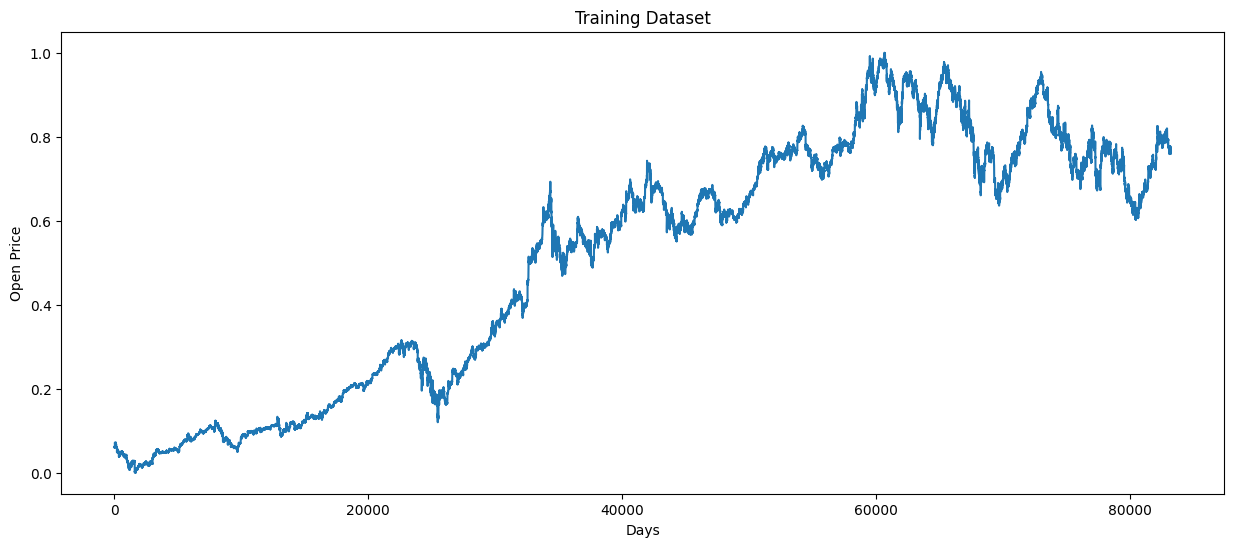

In [22]:
from matplotlib import pyplot as plt
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.title('Training Dataset')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot()

#### Plot Open price v/s days - Test Data

[]

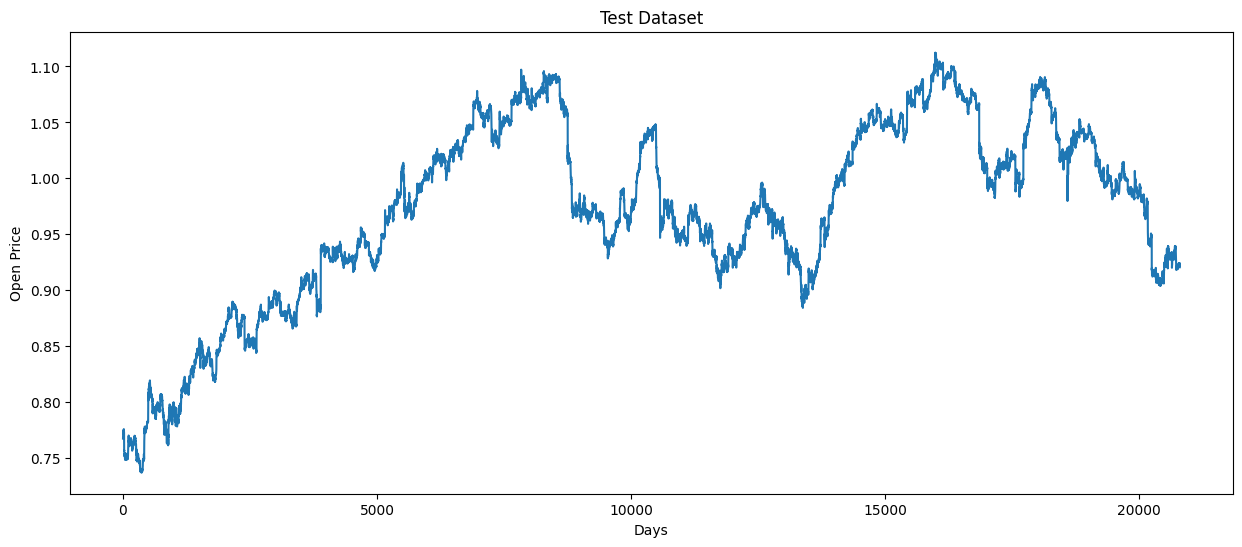

In [23]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_test_scaled)
plt.title('Test Dataset')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot()

#### Create X_train and y_train from train data

In [24]:
X_train = []
y_train = []

X_test = []
y_test = []
time_step = 50

for i in range(time_step, training_length):
    X_train.append(dataset_train_scaled[i - time_step: i, 0])
    y_train.append(dataset_train_scaled[i, 0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print(X_train.shape)
print(y_train.shape)

# Test data
for j in range(time_step, test_length):
    X_test.append(dataset_test_scaled[j-time_step: j, 0])
    y_test.append(dataset_test_scaled[j,0])

# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print(X_test.shape)
print(y_test.shape)

(83172, 50)
(83172,)
(83172, 50, 1)
(83172, 1)
(20756, 50)
(20756,)
(20756, 50, 1)
(20756, 1)


#### RNN Model

In [25]:
import torch
import torch.nn as nn

# simple RNN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(
            input_size = 1,
            hidden_size= 50,
            num_layers = 2,
            batch_first=True,
        )

        self.fc = nn.Linear(50,1)

    def forward(self,x):
        h0 = torch.zeros(2, x.size(0), 50)
        out, _ = self.rnn(x,h0)
        out = self.fc(out[:, -1,:])
        return out
        
# LSTM Model
class lstm_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size = 1,
            hidden_size= 50,
            num_layers = 2,
            batch_first=True,
        )

        self.fc = nn.Linear(50,1)

    def forward(self,x):
        h0 = torch.zeros(2, x.size(0), 50)
        c0 = torch.zeros(2, x.size(0), 50)
        out, _ = self.lstm(x,(h0,c0))
        out = self.fc(out[:, -1,:])
        return out

# GRU Model
class gru_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(
            input_size = 1,
            hidden_size= 50,
            num_layers = 2,
            batch_first=True,
        )

        self.fc = nn.Linear(50,1)

    def forward(self,x):
        h0 = torch.zeros(2, x.size(0), 50)
        out, _ = self.gru(x,h0)
        out = self.fc(out[:, -1,:])
        return out

#### Training loop

Epoch:  0 Training Loss: 0.0010295463129729944 Test Loss:  7.478460409297091e-05
Epoch:  1 Training Loss: 4.8392476415961904e-05 Test Loss:  2.8423707371635268e-05
Epoch:  2 Training Loss: 4.012784630884443e-05 Test Loss:  0.00011031707065110543
Epoch:  3 Training Loss: 3.660794791639542e-05 Test Loss:  6.699589041895357e-05
Epoch:  4 Training Loss: 3.13862642672328e-05 Test Loss:  9.692012769427002e-05
Epoch:  5 Training Loss: 0.013342534158514087 Test Loss:  0.000568307607024438
Epoch:  6 Training Loss: 0.0004151494826834651 Test Loss:  0.0004833492120479395
Epoch:  7 Training Loss: 0.0005481576332678847 Test Loss:  0.0016822187345286903
Epoch:  8 Training Loss: 0.0009822571677942777 Test Loss:  0.0041808764396521906
Epoch:  9 Training Loss: 0.000639624377550573 Test Loss:  0.002465458164526633


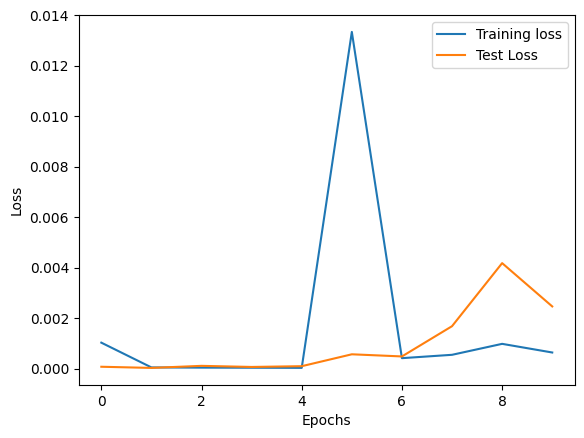

In [28]:
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchmetrics.regression import MeanSquaredError


training_dataset = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float()
)

test_dataset = TensorDataset(
    torch.from_numpy(X_test).float(),
    torch.from_numpy(y_test).float()
)

train_loader = DataLoader(training_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)

# simple RNN
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
num_epochs = 10
mean_epoch_train_loss = 0.0
epoch_train_loss = []
epoch_test_loss = []
mse = MeanSquaredError()
mean_epoch_test_loss = 0.0

for epoch in range(num_epochs):
    training_loss = 0.0
    validation_loss = 0.0
    for seqs, labels in train_loader:
        #print(seqs)
        output = net(seqs)
        loss = criterion(output, labels)
        optimizer .zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    mean_epoch_train_loss = training_loss / len(train_loader)
    epoch_train_loss.append(mean_epoch_train_loss)

    
    net.eval()
    with torch.no_grad():
        for seqs, label in test_loader:
            test_output = net(seqs)
            test_output_squeezed = torch.squeeze(test_output)
            test_loss = mse(test_output, label)
            validation_loss += test_loss.item()
    mean_epoch_test_loss = validation_loss/ len(test_loader)
    epoch_test_loss.append(mean_epoch_test_loss)
    
    
    print("Epoch: ", epoch, "Training Loss:", mean_epoch_train_loss, "Test Loss: ", mean_epoch_test_loss)
            

plt.plot(range(num_epochs), epoch_train_loss, label='Training loss')
plt.plot(range(num_epochs), epoch_test_loss, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### GRU model

Epoch:  0 Training Loss: 0.0004948238911934683 Test Loss:  2.1633949335007575e-05
Epoch:  1 Training Loss: 3.170843171694206e-05 Test Loss:  9.634844061040964e-05
Epoch:  2 Training Loss: 2.848740282014061e-05 Test Loss:  5.187436664427353e-06
Epoch:  3 Training Loss: 2.2940492992852877e-05 Test Loss:  2.9423184825051205e-05
Epoch:  4 Training Loss: 5.631105768897872e-05 Test Loss:  0.0001493038494118082
Epoch:  5 Training Loss: 1.0259827449706685e-05 Test Loss:  1.2267839340351062e-05
Epoch:  6 Training Loss: 1.4539476470138295e-05 Test Loss:  2.98065434334988e-05
Epoch:  7 Training Loss: 1.537101619644496e-05 Test Loss:  0.00015665333360350184
Epoch:  8 Training Loss: 1.2432105276042413e-05 Test Loss:  3.172071667187573e-05
Epoch:  9 Training Loss: 0.0002514978597022176 Test Loss:  5.0129404214133574e-05


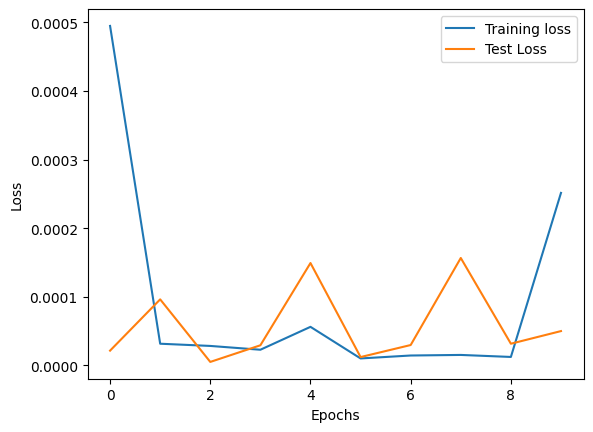

In [29]:
net = gru_Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
num_epochs = 10
mean_epoch_train_loss = 0.0
epoch_train_loss = []
epoch_test_loss = []
mse = MeanSquaredError()
mean_epoch_test_loss = 0.0

for epoch in range(num_epochs):
    training_loss = 0.0
    validation_loss = 0.0
    for seqs, labels in train_loader:
        #print(seqs)
        output = net(seqs)
        loss = criterion(output, labels)
        optimizer .zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    mean_epoch_train_loss = training_loss / len(train_loader)
    epoch_train_loss.append(mean_epoch_train_loss)

    
    net.eval()

    with torch.no_grad():
        for seqs, label in test_loader:
            test_output = net(seqs)
            test_output_squeezed = torch.squeeze(test_output)
            test_loss = mse(test_output, label)
            validation_loss += test_loss.item()
    mean_epoch_test_loss = validation_loss/ len(test_loader)
    epoch_test_loss.append(mean_epoch_test_loss)
    
    print("Epoch: ", epoch, "Training Loss:", mean_epoch_train_loss, "Test Loss: ", mean_epoch_test_loss)
            

plt.plot(range(num_epochs), epoch_train_loss, label='Training loss')
plt.plot(range(num_epochs), epoch_test_loss, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### LSTM Model

Epoch:  0 Training Loss: 0.0007042542858246911 Test Loss:  0.0002743126631755261
Epoch:  1 Training Loss: 0.00010228097929922451 Test Loss:  1.0122720380623972e-05
Epoch:  2 Training Loss: 2.0248284979442242e-05 Test Loss:  0.0002985136546927746
Epoch:  3 Training Loss: 2.741868262561116e-05 Test Loss:  1.0849704921156444e-05
Epoch:  4 Training Loss: 2.56347265503037e-05 Test Loss:  4.112172091525351e-06
Epoch:  5 Training Loss: 2.116227620095292e-05 Test Loss:  3.7466455729337704e-06
Epoch:  6 Training Loss: 1.8040060749440885e-05 Test Loss:  0.00019028705222668717
Epoch:  7 Training Loss: 1.7336232963507732e-05 Test Loss:  6.0844738429138415e-06
Epoch:  8 Training Loss: 1.4124534478841501e-05 Test Loss:  4.237544539347045e-05
Epoch:  9 Training Loss: 1.612212611675682e-05 Test Loss:  5.379784977977719e-06


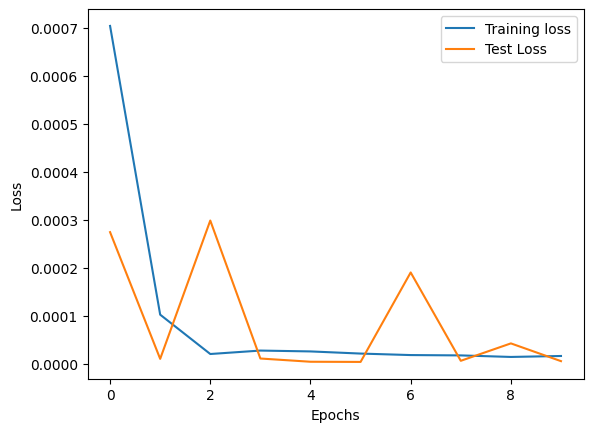

In [ ]:
net = lstm_Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
num_epochs = 10
mean_epoch_train_loss = 0.0
epoch_train_loss = []
epoch_test_loss = []
mse = MeanSquaredError()
mean_epoch_test_loss = 0.0

for epoch in range(num_epochs):
    training_loss = 0.0
    validation_loss = 0.0
    for seqs, labels in train_loader:
        #print(seqs)
        output = net(seqs)
        loss = criterion(output, labels)
        optimizer .zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
    mean_epoch_train_loss = training_loss / len(train_loader)
    epoch_train_loss.append(mean_epoch_train_loss)


    net.eval()

    with torch.no_grad():
        for seqs, label in test_loader:
            test_output = net(seqs)
            test_output_squeezed = torch.squeeze(test_output)
            test_loss = mse(test_output, label)
            validation_loss += test_loss.item()
    mean_epoch_test_loss = validation_loss/ len(test_loader)
    epoch_test_loss.append(mean_epoch_test_loss)
    
    print("Epoch: ", epoch, "Training Loss:", mean_epoch_train_loss, "Test Loss: ", mean_epoch_test_loss)
            

plt.plot(range(num_epochs), epoch_train_loss, label='Training loss')
plt.plot(range(num_epochs), epoch_test_loss, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()